We will use those libraries in this tutorial:

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pylab as plt

In [4]:
df_train=pd.read_csv('data/train.csv',header=0,index_col=0,parse_dates=['date'])
df_oil = pd.read_csv('data/oil.csv',header=0,parse_dates=['date'])
df_stores = pd.read_csv('data/stores.csv',header=0,index_col=0)
df_transactions = pd.read_csv('data/transactions.csv',header=0,parse_dates=['date'])
df_holidays = pd.read_csv('data/holidays_events.csv',header=0,parse_dates=['date'])

In [5]:
df_train.tail(10)

,date,store_nbr,family,sales,onpromotion
id,,,,,
3000878,2017-08-15,9,MAGAZINES,11.000,0
3000879,2017-08-15,9,MEATS,449.228,0
3000880,2017-08-15,9,PERSONAL CARE,522.000,11
3000881,2017-08-15,9,PET SUPPLIES,6.000,0
3000882,2017-08-15,9,PLAYERS AND ELECTRONICS,6.000,0
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [6]:
df_oil.head(10)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


As you can see, we have 43 missing values in oil dataset.

In [7]:
df_oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [8]:
df_oil.iloc[0,1]=df_oil.iloc[1,1]
df_oil.fillna(method='ffill', inplace=True)
df_oil.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

Now, let's merge all the dataframes.

In [9]:
df_train = df_train.merge(df_oil, on='date', how='left')
df_train = df_train.merge(df_stores, on='store_nbr', how='left')
df_train = df_train.merge(df_transactions, on=['date','store_nbr'], how='left')
df_train = df_train.merge(df_holidays, on='date', how='left')

In [10]:
df_train

,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred
0,2013-01-01,1,AUTOMOTIVE,0.000,0,93.14,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-01,1,BABY CARE,0.000,0,93.14,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2013-01-01,1,BEAUTY,0.000,0,93.14,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,2013-01-01,1,BEVERAGES,0.000,0,93.14,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,2013-01-01,1,BOOKS,0.000,0,93.14,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,9,POULTRY,438.133,0,47.57,Quito,Pichincha,B,6,2155.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054344,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Quito,Pichincha,B,6,2155.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054345,2017-08-15,9,PRODUCE,2419.729,148,47.57,Quito,Pichincha,B,6,2155.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054346,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Quito,Pichincha,B,6,2155.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False


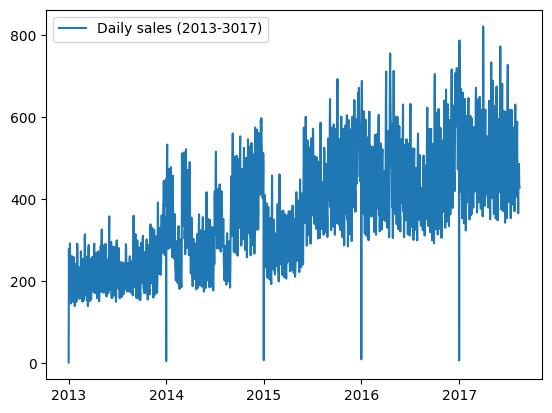

In [11]:
df_plot=df_train[["date","sales"]].groupby(by='date',as_index=False).mean()
pyplot.plot(df_plot['date'],df_plot['sales'],label='Daily sales (2013-3017)')
pyplot.legend()
pyplot.show()

Text(0, 0.5, 'Daily sales')

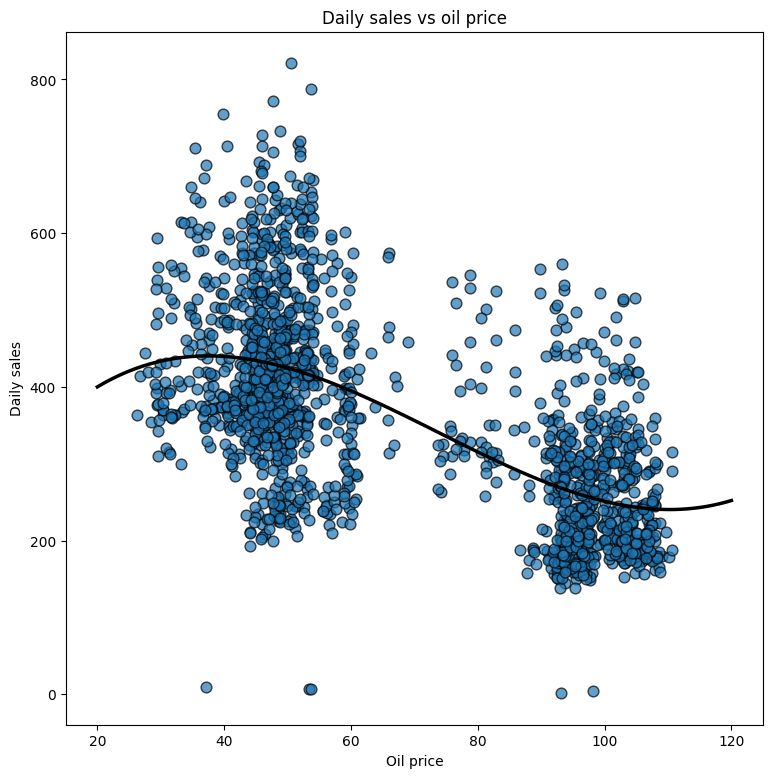

In [12]:
df_plot = df_train[["date","dcoilwtico","sales"]].groupby(by='date').mean()
df_plot.fillna(method='ffill',inplace=True)


# Initialize layout
fig, ax = pyplot.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(df_plot['dcoilwtico'], df_plot['sales'], label='Daily sales vs oil price',
           s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
b3, b2, b1, a = np.polyfit(df_plot['dcoilwtico'], df_plot['sales'], deg=3)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(20, 120, num=100)

# Plot regression line
ax.plot(xseq, a + b1 * xseq + b2 * xseq * xseq + b3 * xseq * xseq * xseq, color="k", lw=2.5)
ax.title.set_text('Daily sales vs oil price')
ax.set_xlabel('Oil price')
ax.set_ylabel('Daily sales')

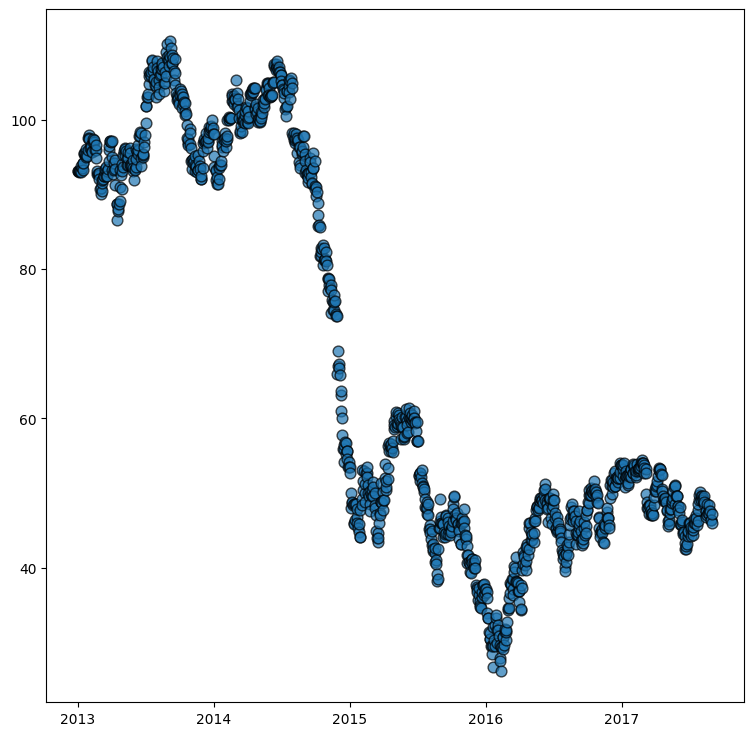

In [13]:
df_oil.tail(10)
fig, ax = pyplot.subplots(figsize= (9, 9))
ax.scatter(df_oil.date,df_oil.dcoilwtico,s=60,alpha=0.7,edgecolors="k")

#### Influence of promotions

Text(0, 0.5, 'Daily sales')

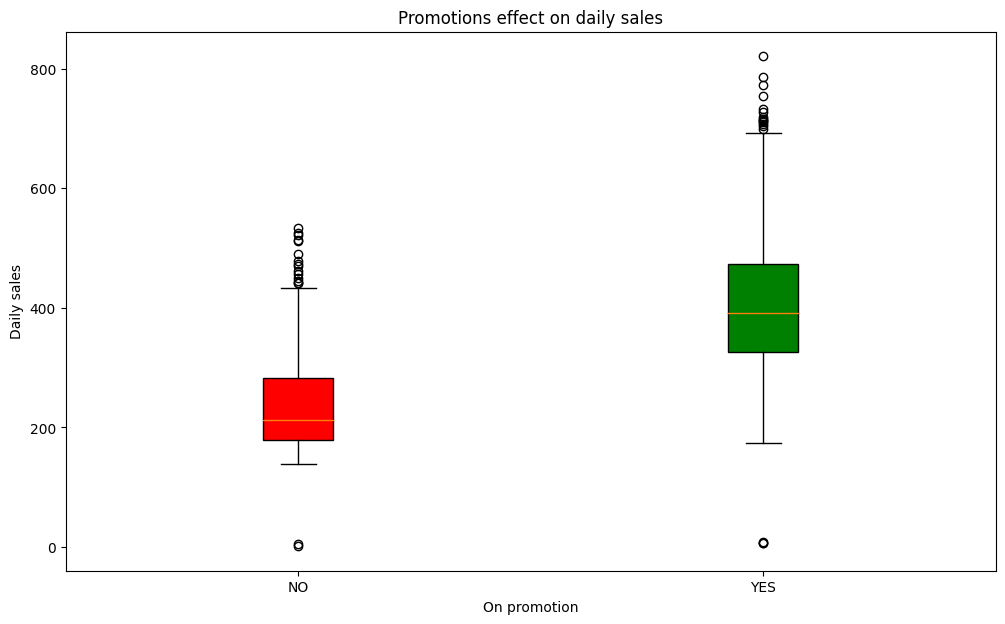

In [14]:
df_plot=df_train[["date","sales","onpromotion"]].groupby(by='date').mean()
data_1=df_plot[df_plot.onpromotion == 0]['sales']
data_2=df_plot[df_plot.onpromotion > 0]['sales']

fig, ax = pyplot.subplots(figsize=(12, 7))
dataset = [data_1, data_2]
labels = ['NO','YES']
colors = ['red','green']
bplot = ax.boxplot(dataset, labels = labels, patch_artist = True)
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax.set_title("Promotions effect on daily sales")
ax.set_xlabel("On promotion")
ax.set_ylabel("Daily sales")

#### Influence of national holidays on the average daily sales

Text(0, 0.5, 'Daily sales')

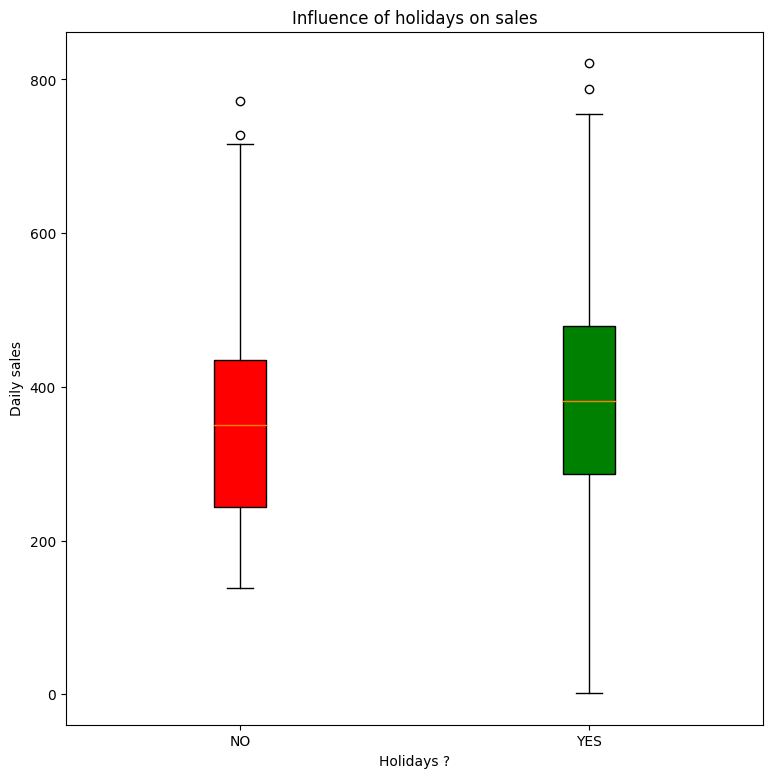

In [15]:
df_plot=df_train.merge(df_holidays,on='date',how='left')
data_1=df_plot[df_plot.type.isnull()][['date','sales']].groupby(by='date').mean()['sales']
data_2=df_plot[df_plot.type.notnull()][['date','sales']].groupby(by='date').mean()['sales']

fig, ax= pyplot.subplots(figsize=(9,9))
dataset=[data_1,data_2]
labels=['NO','YES']
colors=['red','green']
bplot=ax.boxplot(dataset,labels=labels,patch_artist=True)
for patch, color in zip(bplot['boxes'],colors):
    patch.set_facecolor(color)
ax.title.set_text('Influence of holidays on sales')
ax.set_xlabel("Holidays ?")
ax.set_ylabel("Daily sales")

In [16]:
#data=df_train[(df_train.family=='BEVERAGES') & (df_train.store_nbr==51) & (df_train.date>pd.Timestamp(2015,1,1))][['date','sales']].reset_index(drop=True)
#data_complet=df_train[(df_train.family=='BEVERAGES') & (df_train.store_nbr==51)][['date','sales']].reset_index(drop=True)
data_complet = df_train[(df_train.family=='BEVERAGES') & (df_train.store_nbr==51)][['date','sales']]
#data_complet['date']=data_complet['date'].dt.strftime('%m/%Y')
data_complet = data_complet.set_index('date',drop=True)
#data_complet.index=pd.to_datetime(data_complet.index)

#data_complet=pd.DataFrame(df_train[(df_train.family=='BEVERAGES') & (df_train.store_nbr==51)][['date','sales']],index_col=0)
#data_complet.index=pd.DatetimeIndex(data_complet.index).to_period('M')
ts = data_complet
#ts.index = ts.index.to_period('M')
#ts
print(data_complet.tail(10))

             sales
date              
2017-08-06  6435.0
2017-08-07  3779.0
2017-08-08  3269.0
2017-08-09  4267.0
2017-08-10  3320.0
2017-08-11  5356.0
2017-08-12  4137.0
2017-08-13  5529.0
2017-08-14  3888.0
2017-08-15  3860.0


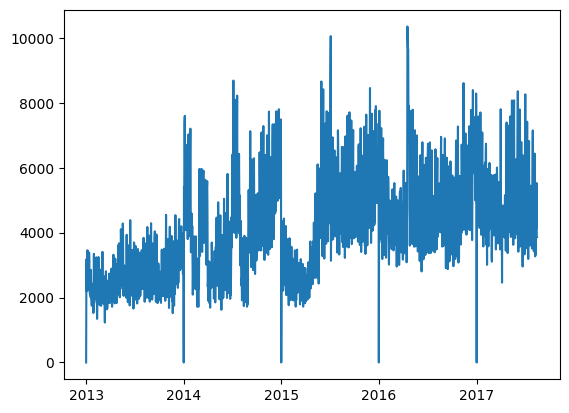

In [17]:
fig, ax = pyplot.subplots()
ax.plot(ts)

In [18]:
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_, model='multiplicative')
fig = result.plot()
plot_mpl(fig)

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [22]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Stationarity test

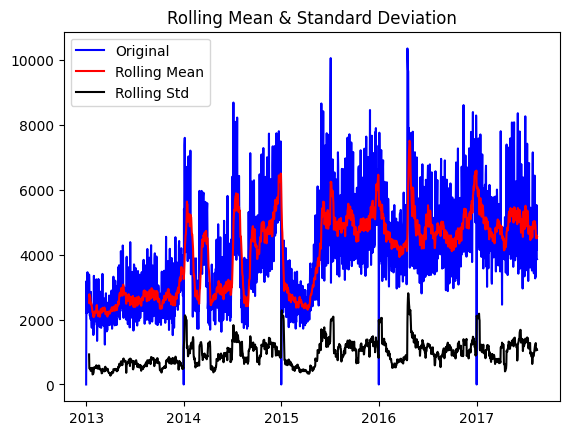

Results of Dickey-Fuller Test:
Test Statistic                   -3.922203
p-value                           0.001877
#Lags Used                       23.000000
Number of Observations Used    1690.000000
Critical Value (1%)              -3.434225
Critical Value (5%)              -2.863252
Critical Value (10%)             -2.567681
dtype: float64


In [23]:
test_stationarity(ts)

Test statistic is smaller than all critical values (1%, 5% and 10%), and p-value is smaller than 5% (if we take 95% as confidence level). Null hypothesis can be rejected, we can conclude that our data is stationary.
We can go to the next level which is time series prediction.

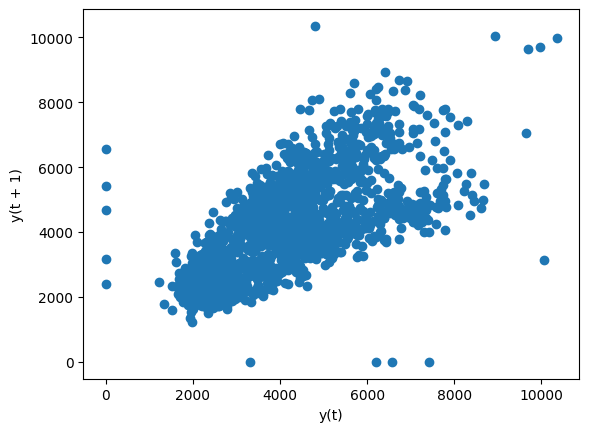

In [24]:
#Correlation between (n) value and (n+1) value
from pandas.plotting import lag_plot
lag_plot(ts)
plt.show()

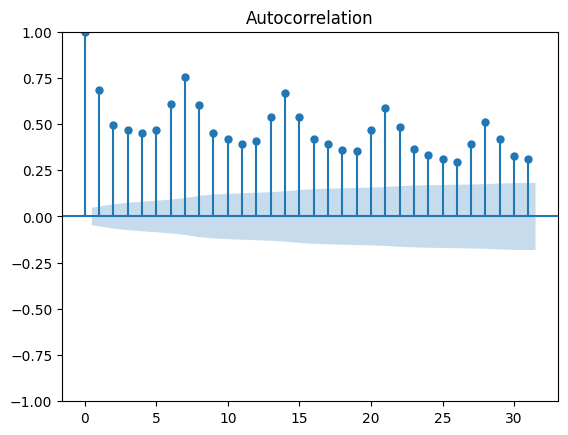

In [25]:
#Correlation coef. by lag (lag1 -> n-1, lag2 ->n-2)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts, lags=31)
plt.show()

### Autoregression model
with lags=31

C:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Test RMSE: 971.130


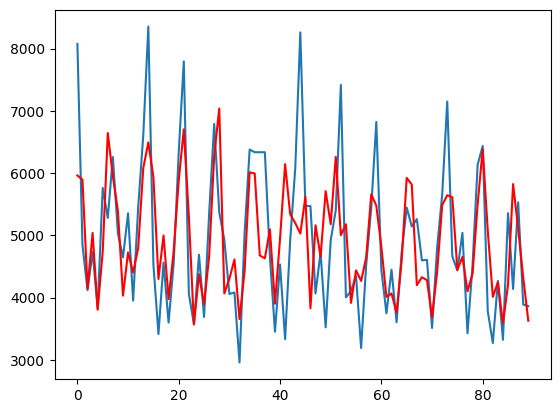

In [26]:
#Autoregression (linear regression)
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

X=pd.DataFrame(data_complet.sales)
train, validation = X[0:len(X)-90], X[len(X)-90:]
train.reset_index(drop=True)
validation.reset_index(drop=True, inplace=True)


window=31
model=AutoReg(train,lags=31)
model_fit=model.fit()
coef= model_fit.params
history = train[len(train)-window:]
history = [history.iloc[i] for i in range(len(history))]

predictions=list()
for t in range(len(validation)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = validation.iloc[t]
    predictions.append(yhat)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(validation, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(validation)
pyplot.plot(predictions, color='red')
pyplot.show()


In [27]:
#Split data into train and validation dataset
train, validation = ts[1:len(ts)-90], ts[len(ts)-90:]
train.tail(10)

,sales
date,
2017-05-11,4319.0
2017-05-12,4739.0
2017-05-13,8072.0
2017-05-14,5831.0
2017-05-15,5539.0
2017-05-16,4001.0
2017-05-17,5209.0
2017-05-18,3624.0
2017-05-19,4985.0


## ARIMA model

Test RMSE: 1197.995


C:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


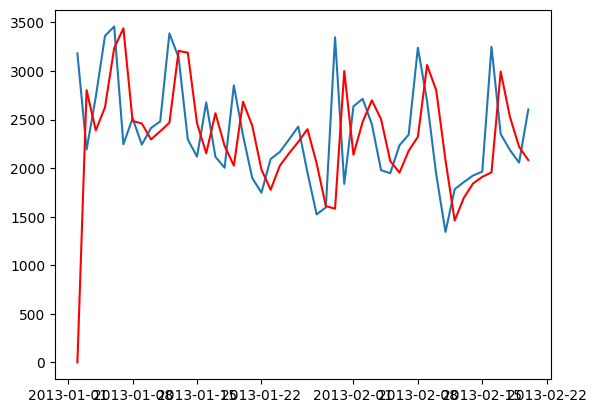

In [28]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(train,order=(1,1,0))
arima_results = arima_model.fit()
plt.plot(train[:50])
plt.plot(arima_results.fittedvalues[:50], color='red')
rmse = sqrt(mean_squared_error(train, arima_results.fittedvalues))
print('Test RMSE: %.3f' % rmse)

C:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Test RMSE: 1009.744


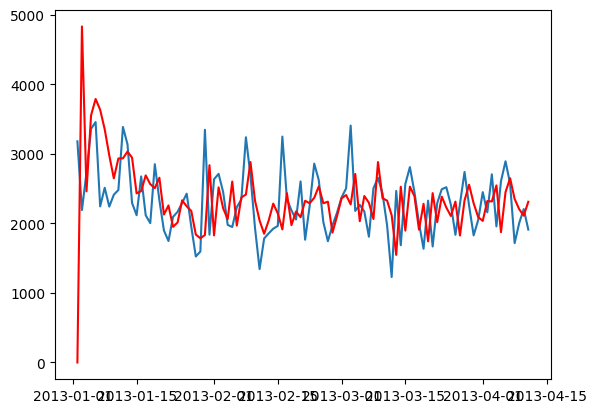

In [29]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(train,order=(5,2,1))
arima_results = arima_model.fit()
plt.plot(train[:100])
plt.plot(arima_results.fittedvalues[:100], color='red')
rmse = sqrt(mean_squared_error(train, arima_results.fittedvalues))
print('Test RMSE: %.3f' % rmse)

## Auto-Arima

In [30]:
import pmdarima as pm
auto_arima_model= pm.auto_arima(y=train)
print(auto_arima_model.summary())
#plt.plot(train[:100])
#plt.plot(arima_results.fittedvalues[:100], color='red')
#rmse = sqrt(mean_squared_error(train, arima_results.fittedvalues))
#print('Test RMSE: %.3f' % rmse)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1623
Model:               SARIMAX(5, 1, 2)   Log Likelihood              -13355.355
Date:                Thu, 29 Sep 2022   AIC                          26726.710
Time:                        12:35:23   BIC                          26769.842
Sample:                             0   HQIC                         26742.716
                               - 1623                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3262      0.033      9.796      0.000       0.261       0.392
ar.L2         -0.6667      0.022    -30.000      0.000      -0.710      -0.623
ar.L3         -0.2105      0.023     -9.084      0.0

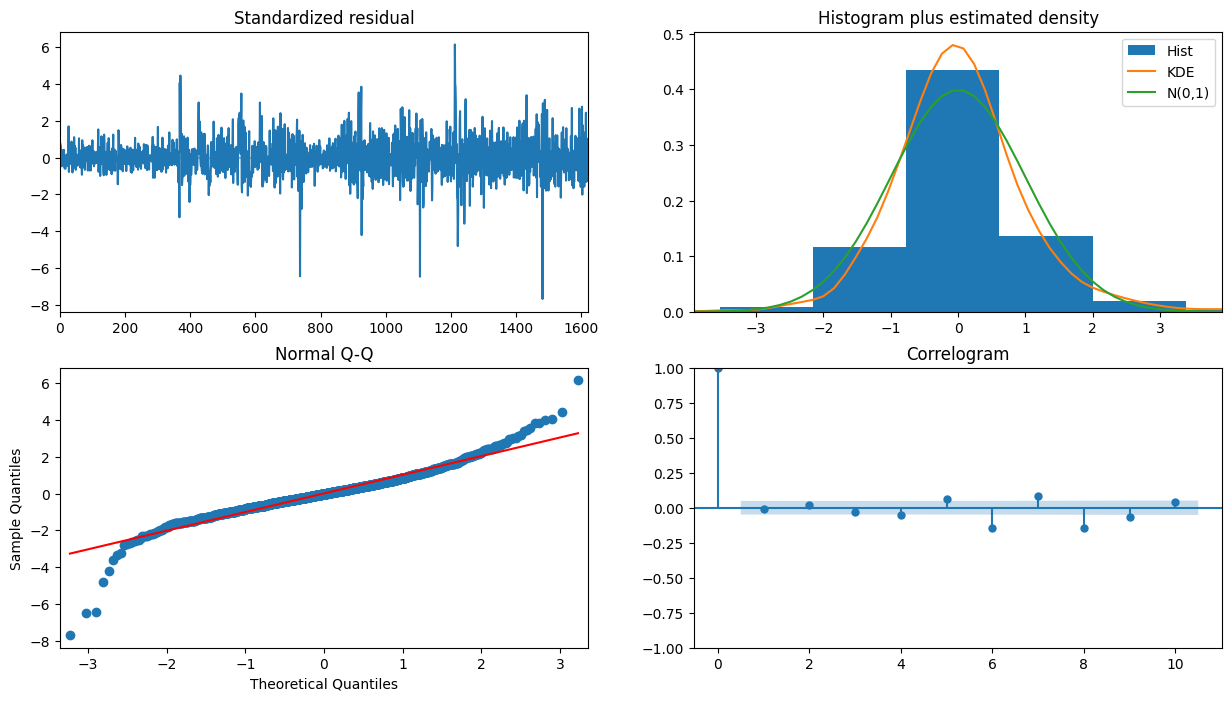

In [31]:
auto_arima_model.plot_diagnostics(figsize=(15,8))
plt.show()

### Naive Seasonal

In [36]:
import numpy
from darts.models import NaiveSeasonal
naiveSeasonal_model= NaiveSeasonal(K=7)
naiveSeasonal_results=naiveSeasonal_model.fit(train)

AttributeError: 'DataFrame' object has no attribute '_assert_univariate'

### ExponentialSmoothing

### Prophet

In [46]:
from darts.models import Prophet
prophet_model=Prophet()
prophet_model_results=prophet_model.fit(train.sales)

AttributeError: 'Series' object has no attribute 'has_range_index'

In [45]:
train.sales

date
2013-01-02    3181.0
2013-01-03    2192.0
2013-01-04    2734.0
2013-01-05    3361.0
2013-01-06    3458.0
               ...  
2017-05-16    4001.0
2017-05-17    5209.0
2017-05-18    3624.0
2017-05-19    4985.0
2017-05-20    6204.0
Name: sales, Length: 1623, dtype: float64